In [1]:
import random
import numpy as np

#Test Data:
nnodes = 6
nodes = list(range(nnodes))
edges = [(x,y) for i, x in enumerate(nodes) for y in nodes[i+1:]]
weights = np.random.random_sample(len(edges))

import networkx as nx

# build Edges:
w_edges = []
nodes = []
for e, w in zip(edges, weights):
    w_edges.append((e[0], e[1], w))
    w_edges.append((e[1], e[0], w))
    nodes.extend(e)
nodes = list(set(nodes))

from konnektor import cyclic_network_planner

# Settings
#cyclesize = list(range(3,5+1))
#cyclesize = len(nodes)-1 # try to keep small!
sub_cycle_size_range = 3
node_cycle_connectivity = 2 #a node should be at least in n cycles
network_planner = cyclic_network_planner(node_cycle_connectivity=node_cycle_connectivity, sub_cycle_size_range=sub_cycle_size_range)


cdg = network_planner.generate_network_double_greedy(edges=edges, weights=weights)

len(cdg.edges), len(edges)

LICENSE: Could not open license file "oe_license.txt" in local directory
LICENSE: N.B. OE_LICENSE environment variable is not set
LICENSE: N.B. OE_DIR environment variable is not set
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
Building Cyclic Graph - START
Priority Queue Gen init - 2023-06-20 13:51:34.498245
	Duration: 0:00:00.001234
Priority Queue Gen complete

Cycle Selection init - 2023-06-20 13:51:34.501392
	Duration: 0:00:00.001316
Cycle Selection complete


Timings:
--------
	 Cycle generation duration: 0:00:00.001234
	 Cycle selection duration: 0:00:00.001316
	 total duration: 0:00:00.008995


(10, 15)

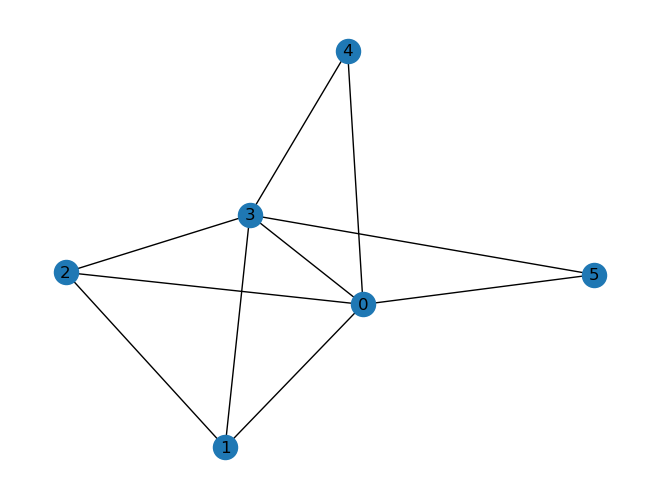

In [2]:
nx.draw(cdg, with_labels=True)

In [3]:
cg = network_planner.generate_network(edges=edges, weights=weights)


Timings:
--------
	 Cycle generation duration: 0:00:00.005676
	 Cycle selection duration: 0:00:00.000109
	 total duration: 0:00:00.006090


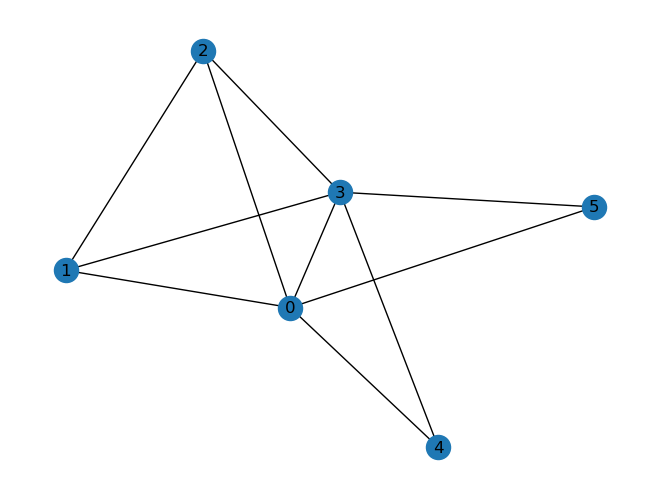

In [4]:
 nx.draw(cdg, with_labels=True)

In [5]:
network_planner._selected_cycles

[(0, 3, 5), (0, 1, 2), (0, 3, 4), (0, 1, 3), (1, 2, 3), (0, 2, 5), (0, 4, 5)]

Text(0.5, 0.98, 'Algorithm II')

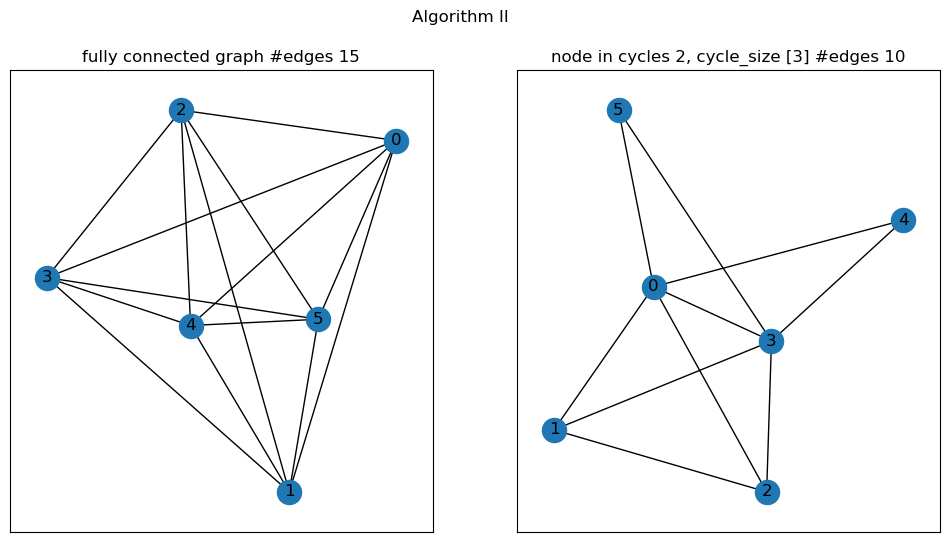

In [6]:
import networkx as nx
from matplotlib import pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=[12,6])
nx.draw_networkx(network_planner.orig_g, with_labels=True, ax=axes[0])
nx.draw_networkx(cdg, with_labels=True, ax=axes[1])


axes[0].set_title("fully connected graph"+" #edges "+str(len(network_planner.orig_g.edges)))
axes[1].set_title("node in cycles "+str(network_planner.node_cycle_connectivity)+", cycle_size "+str(network_planner.sub_cycle_size_range)+" #edges "+str(len(cdg.edges)))
fig.suptitle("Algorithm II")

Text(0.5, 0.98, 'Algorithm I')

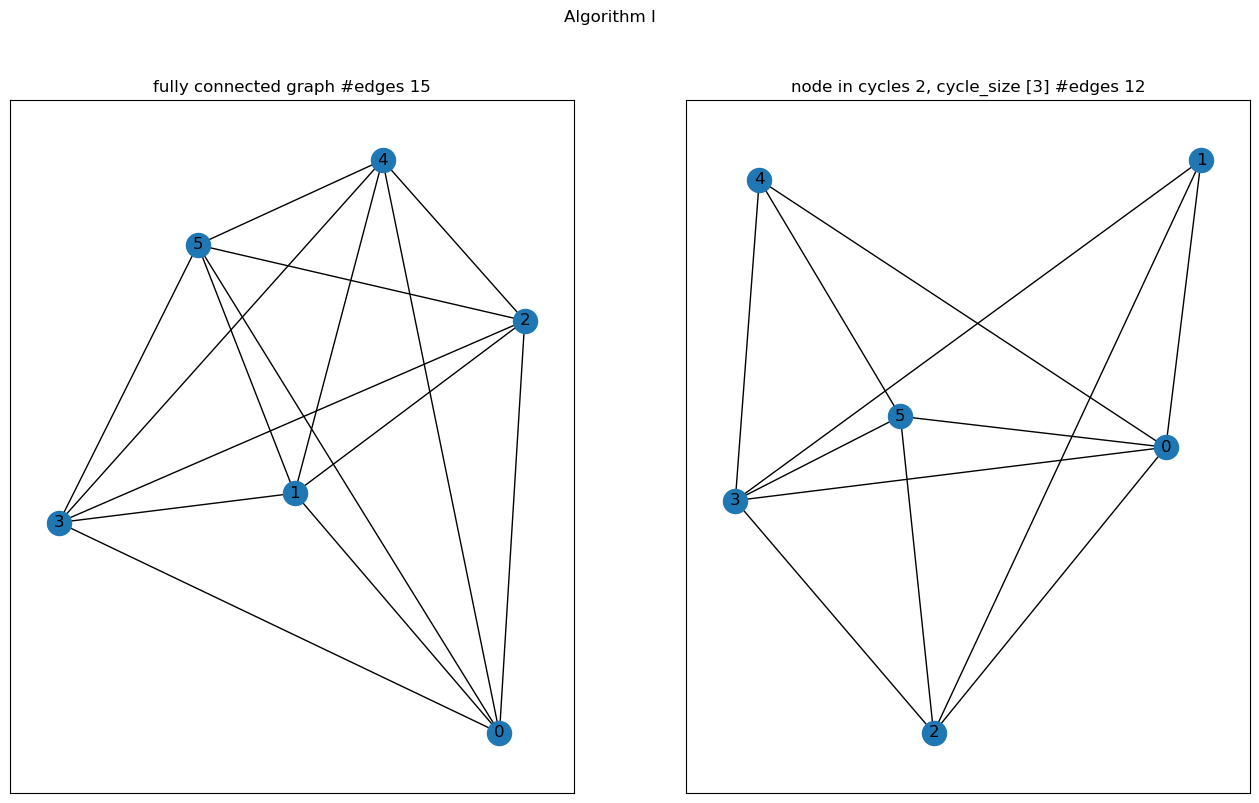

In [7]:
import networkx as nx
from matplotlib import pyplot as plt


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=[16,9])
nx.draw_networkx(network_planner.orig_g, with_labels=True, ax=axes[0])
nx.draw_networkx(cg, with_labels=True, ax=axes[1])


axes[0].set_title("fully connected graph"+" #edges "+str(len(network_planner.orig_g.edges)))
axes[1].set_title("node in cycles "+str(network_planner.node_cycle_connectivity)+", cycle_size "+str(network_planner.sub_cycle_size_range)+" #edges "+str(len(cg.edges)))
fig.suptitle("Algorithm I")

In [8]:
#Test Data:
nnodes = 8
nodes = list(range(nnodes))
edges = [(x,y) for i, x in enumerate(nodes) for y in nodes[i+1:]]
weights = np.random.random_sample(len(edges))

import networkx as nx

# build Edges:
w_edges = []
nodes = []
for e, w in zip(edges, weights):
    w_edges.append((e[0], e[1], w))
    w_edges.append((e[1], e[0], w))
    nodes.extend(e)
nodes = list(set(nodes))

In [9]:
 #Benchmark - Hyper Param test
from tqdm import tqdm
sub_cycle_size_ranges = range(3, 6)
node_cycle_connectivitys = range(1,4)

orig_g = network_planner.orig_g
gs = []
for sub_cycle_size_range in tqdm(sub_cycle_size_ranges, desc="cycle size"):
    gs.append(orig_g)
    for node_cycle_connectivity in tqdm(node_cycle_connectivitys, desc="node connect", leave=False):
        network_planner = cyclic_network_planner(node_cycle_connectivity=node_cycle_connectivity, sub_cycle_size_range=sub_cycle_size_range)
        gs.append(network_planner.generate_network(edges=edges, weights=weights))
        #print(network_planner._selected_cycles)

node connect:   0%|          | 0/3 [00:00<?, ?it/s]
Timings:
--------
	 Cycle generation duration: 0:00:00.005883
	 Cycle selection duration: 0:00:00.000172
	 total duration: 0:00:00.006319

Timings:
--------
	 Cycle generation duration: 0:00:00.009189
	 Cycle selection duration: 0:00:00.000248
	 total duration: 0:00:00.009694

Timings:
--------
	 Cycle generation duration: 0:00:00.005369
	 Cycle selection duration: 0:00:00.000145
	 total duration: 0:00:00.005873

                                                   
node connect:   0%|          | 0/3 [00:00<?, ?it/s]
Timings:
--------
	 Cycle generation duration: 0:00:00.009914
	 Cycle selection duration: 0:00:00.000219
	 total duration: 0:00:00.010306

Timings:
--------
	 Cycle generation duration: 0:00:00.009737
	 Cycle selection duration: 0:00:00.000297
	 total duration: 0:00:00.010272

Timings:
--------
	 Cycle generation duration: 0:00:00.016845
	 Cycle selection duration: 0:00:00.000303
	 total duration: 0:00:00.017445

node conne

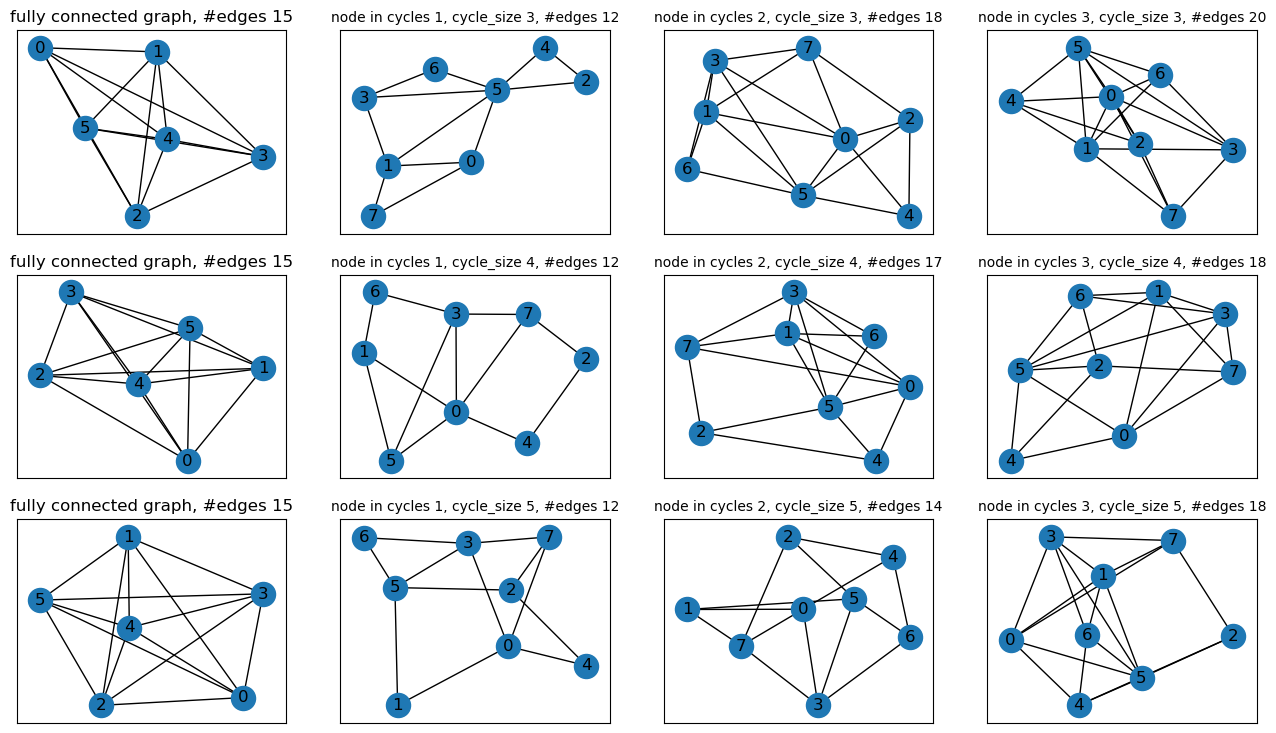

In [10]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

cols = len(node_cycle_connectivitys)+1
rows= len(sub_cycle_size_ranges)
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=[16,9])

gi = 0
for i, rax in enumerate(axes):
    for j, ax in enumerate(rax):
        g = gs[gi]
        nx.draw_networkx(g, with_labels=True, ax=ax)
        if(j==0):
            ax.set_title("fully connected graph, #edges "+str(len(g.edges)))
        else:
            ax.set_title("node in cycles "+str(node_cycle_connectivitys[j-1])+", cycle_size "+str(sub_cycle_size_ranges[i])+", #edges "+str(len(g.edges)), fontsize=10)
        gi+=1



In [11]:
 #Benchmark - Hyper Param test
from tqdm import tqdm
sub_cycle_size_ranges = range(3, 8)
node_cycle_connectivitys = range(1,8)

orig_g = network_planner.orig_g
gs = []
for sub_cycle_size_range in tqdm(sub_cycle_size_ranges, desc="cycle size"):
    gs.append(orig_g)
    for node_cycle_connectivity in tqdm(node_cycle_connectivitys, desc="node connect", leave=False):
        network_planner = cyclic_network_planner(node_cycle_connectivity=node_cycle_connectivity, sub_cycle_size_range=sub_cycle_size_range)
        gs.append(network_planner.generate_network_double_greedy(edges=edges, weights=weights))
        #print(network_planner._selected_cycles)

node connect:   0%|          | 0/7 [00:00<?, ?it/s]Building Cyclic Graph - START
Priority Queue Gen init - 2023-06-20 13:51:39.863339
	Duration: 0:00:00.001892
Priority Queue Gen complete

Cycle Selection init - 2023-06-20 13:51:39.868874
	Duration: 0:00:00.004954
Cycle Selection complete


Timings:
--------
	 Cycle generation duration: 0:00:00.001892
	 Cycle selection duration: 0:00:00.004954
	 total duration: 0:00:00.015004
Building Cyclic Graph - START
Priority Queue Gen init - 2023-06-20 13:51:39.887962
	Duration: 0:00:00.002914
Priority Queue Gen complete

Cycle Selection init - 2023-06-20 13:51:39.894061
	Duration: 0:00:00.001580
Cycle Selection complete


Timings:
--------
	 Cycle generation duration: 0:00:00.002914
	 Cycle selection duration: 0:00:00.001580
	 total duration: 0:00:00.010619
Building Cyclic Graph - START
Priority Queue Gen init - 2023-06-20 13:51:39.906242
	Duration: 0:00:00.001603
Priority Queue Gen complete

Cycle Selection init - 2023-06-20 13:51:39.916511
	Du

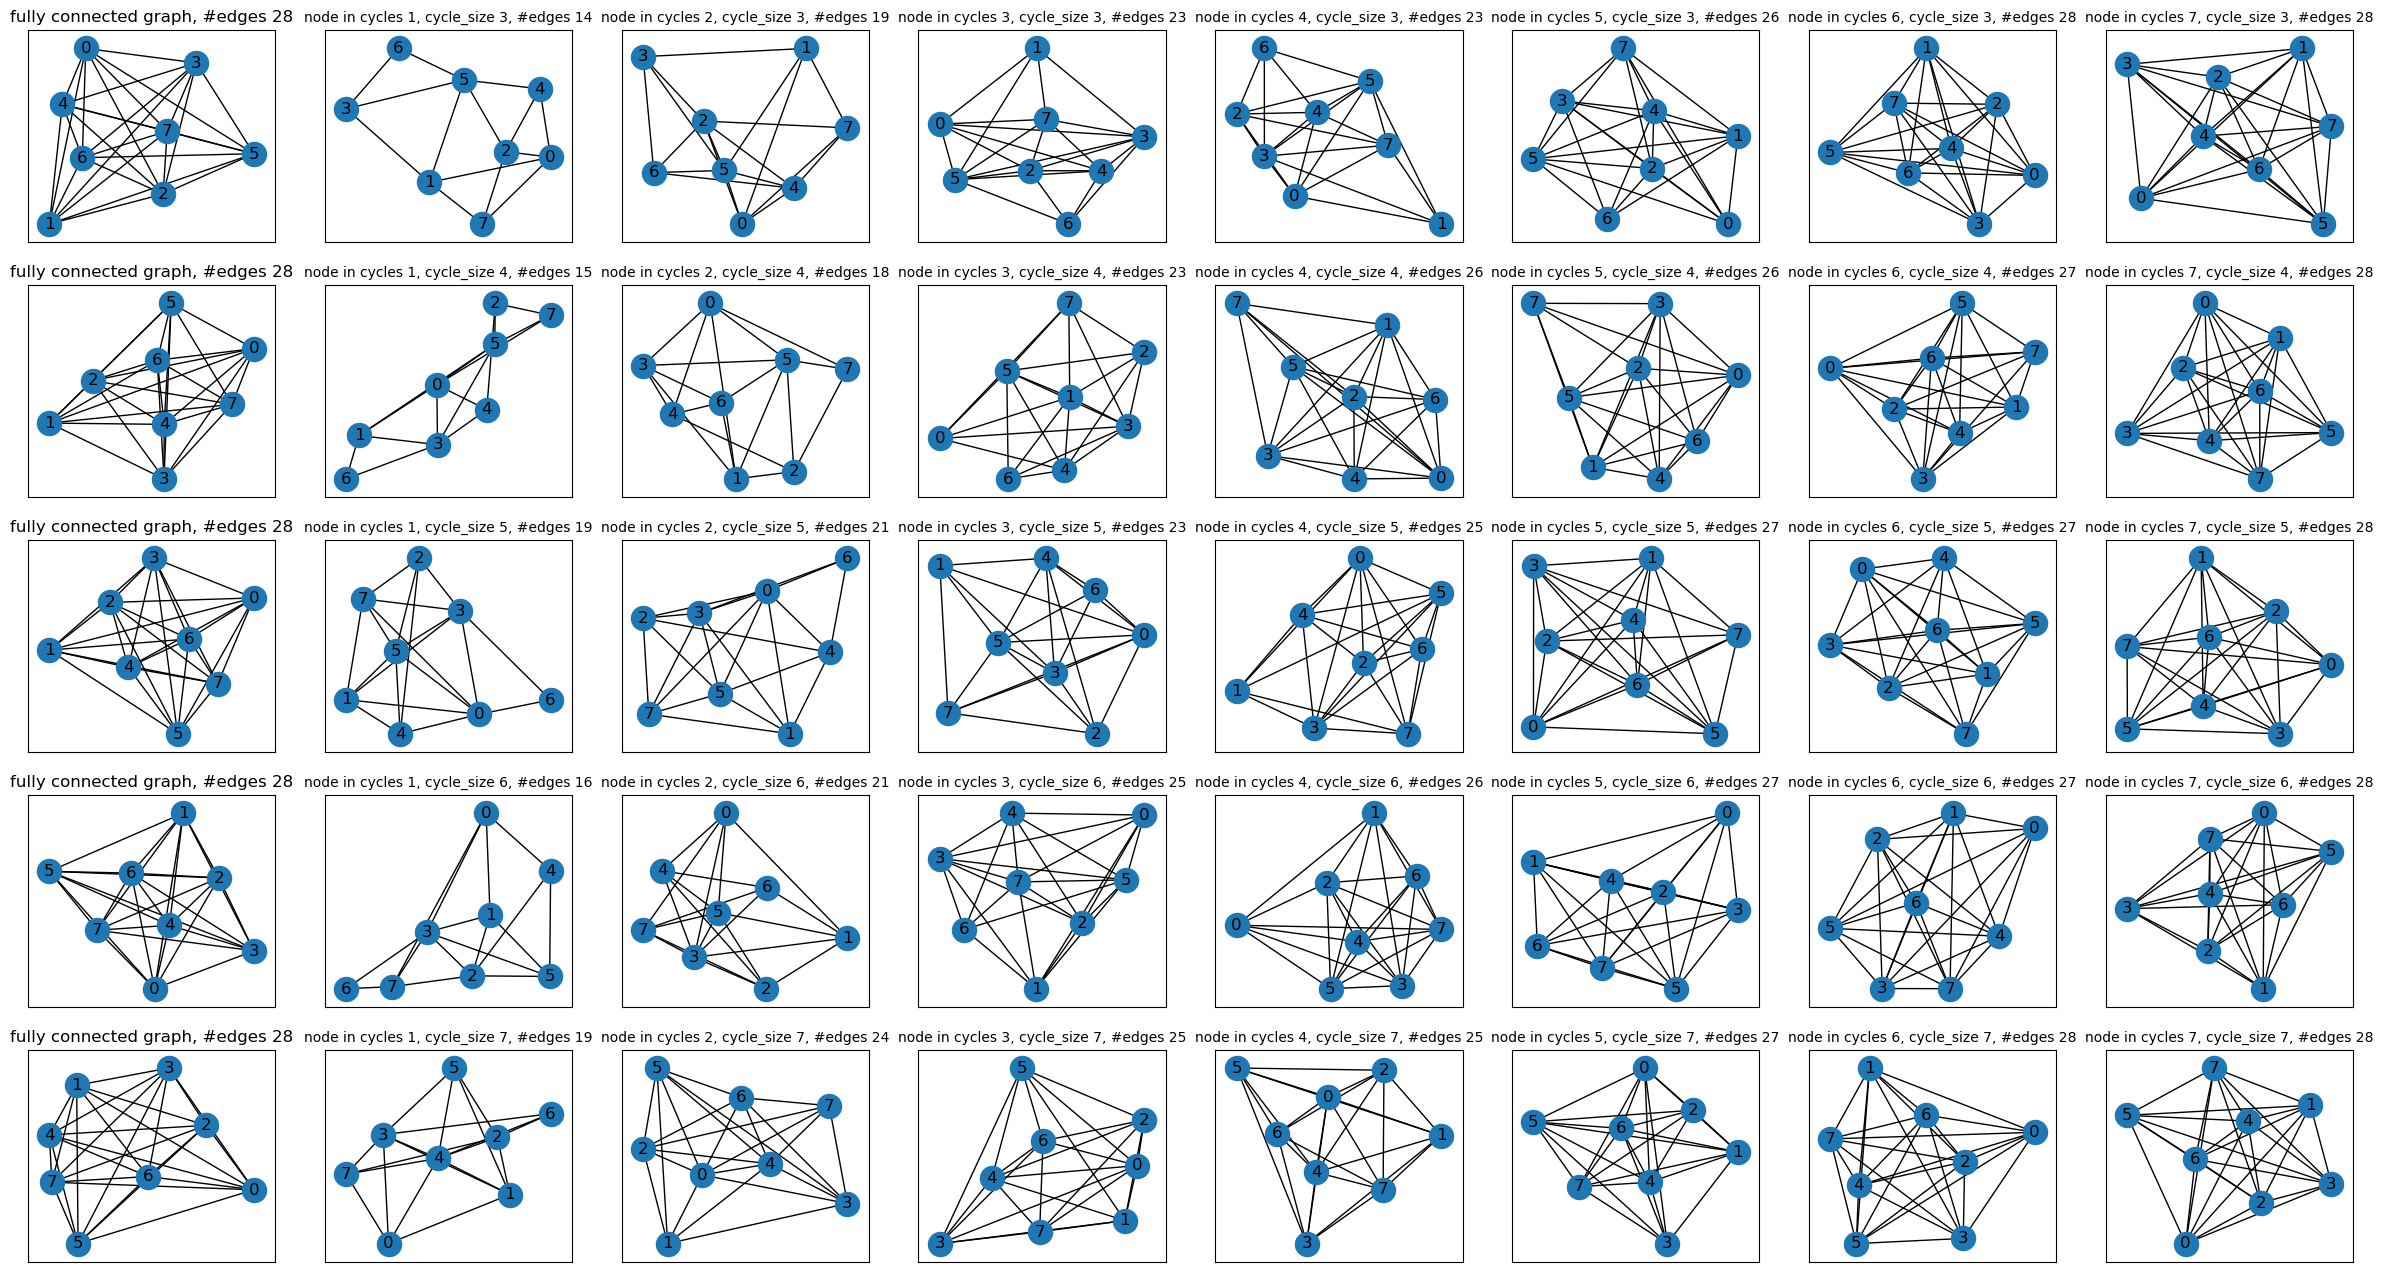

In [12]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

cols = len(node_cycle_connectivitys)+1
rows= len(sub_cycle_size_ranges)
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=[30,16])

gi = 0
for i, rax in enumerate(axes):
    for j, ax in enumerate(rax):
        g = gs[gi]
        gi+=1

        if(g is None):
            continue
        else:
            nx.draw_networkx(g, with_labels=True, ax=ax)
            if(j==0):
                ax.set_title("fully connected graph, #edges "+str(len(g.edges)))
            else:
                ax.set_title("node in cycles "+str(node_cycle_connectivitys[j-1])+", cycle_size "+str(sub_cycle_size_ranges[i])+", #edges "+str(len(g.edges)), fontsize=10)



In [ ]:
import random
import numpy as np
from konnektor import cyclic_network_planner

sub_cycle_size_range = 3
node_cycle_connectivity = 2 #a node should be at least in n cycles

#Test Data: $
steps = [ 10, 20, 30, 40, 50, 60,70,80, 90, 100, 300, 500, 700, 1000] #
cgs=[]
for n in steps: #range(10, 81, 10):
    print("Number of nodes:", n)
    nodes = (range(n))
    edges = [(x,y) for i, x in enumerate(nodes) for y in nodes[i+1:]]
    weights = np.random.random_sample(len(edges))

    network_planner = cyclic_network_planner(node_cycle_connectivity=node_cycle_connectivity, sub_cycle_size_range=sub_cycle_size_range)
    cg = network_planner.generate_network_double_greedy(edges=edges, weights=weights)
    cgs.append([network_planner.orig_g, cg])
    print()

Number of nodes: 5000


Building Cyclic Graph - START
Priority Queue Gen init - 2023-06-20 13:52:13.595105

KeyboardInterrupt



In [ ]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

cols = len(node_cycle_connectivitys)+1
rows= len(sub_cycle_size_ranges)
fig, axes = plt.subplots(ncols=2, nrows=len(cgs), figsize=[16, 40])

gi = 0
for i, rax in enumerate(axes):
    ax1, ax2 = rax
    gs = cgs[gi]
    nx.draw_networkx(gs[0], with_labels=True, ax=ax1)
    nx.draw_networkx(gs[1], with_labels=True, ax=ax2)

    ax1.set_title("fully connected graph, #nodes"+str(len(gs[0].nodes))+" #edges "+str(len(gs[0].edges)))
    ax2.set_title("node in cycles "+str(node_cycle_connectivity)+", cycle_size "+str(sub_cycle_size_range)+", #edges "+str(len(gs[1].edges)), fontsize=10)
    gi+=1

